# 💻 Laboratory Task 4  
**Submitted by:** Rekha R  
**Enrollment No.:** MT23AAI063



## Task 1: Bayesian Probability for Disease Diagnosis

In [ ]:
def compute_bayes_theorem(sensitivity, specificity, prevalence):
    # Convert percentages to decimals
    sensitivity = sensitivity / 100
    specificity = specificity / 100
    prevalence = prevalence / 100

    # Calculate P(Positive)
    false_positive_rate = 1 - specificity
    P_positive = (sensitivity * prevalence) + (false_positive_rate * (1 - prevalence))

    # Apply Bayes' Theorem
    P_disease_given_positive = (sensitivity * prevalence) / P_positive

    # Convert result to percentage
    return round(P_disease_given_positive * 100, 2)

In [ ]:
# --- User Inputs ---
sensitivity = float(input("Enter test sensitivity (%): "))
specificity = float(input("Enter test specificity (%): "))
prevalence = float(input("Enter disease prevalence in population (%): "))

# --- Computation ---
result = compute_bayes_theorem(sensitivity, specificity, prevalence)

# --- Output ---
print(f"\n Probability that a person actually has the disease given a positive test result: {result}%")

Enter test sensitivity (%): 90
Enter test specificity (%): 95
Enter disease prevalence in population (%): 1

 Probability that a person actually has the disease given a positive test result: 15.38%


### Result
This shows how even with a good test, if the disease is rare, the chance of a true positive is still low.

## Task 2 Visualizing Probability Distributions

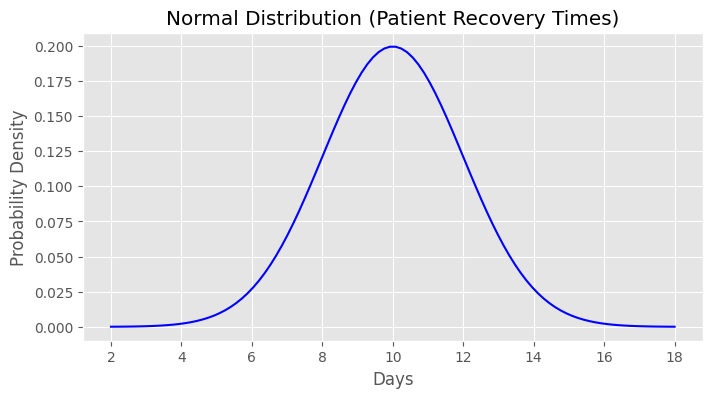

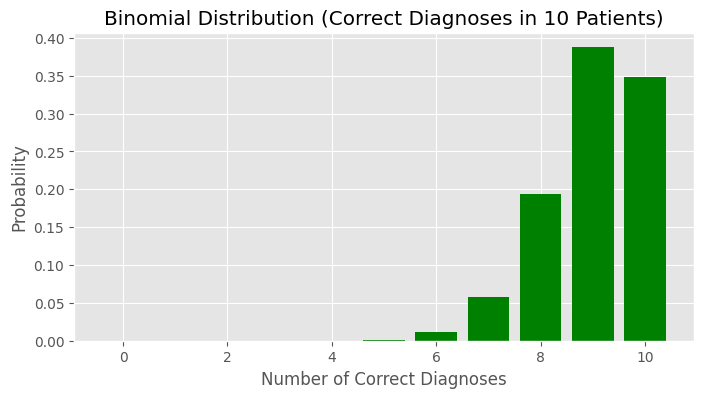

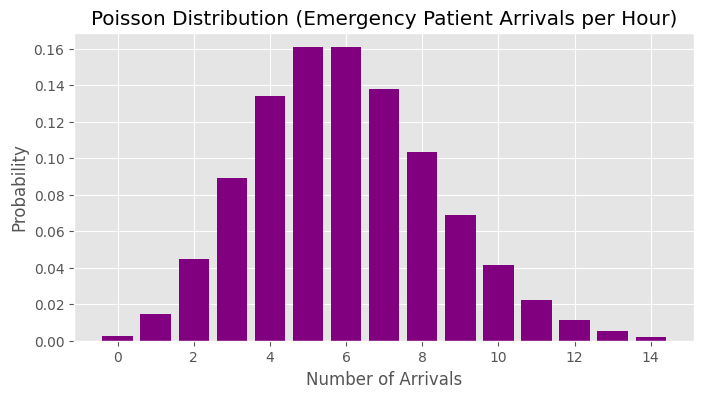

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson

plt.style.use('ggplot')
# --- 1. Normal Distribution: Patient Recovery Times ---
mean = 10  # days
std_dev = 2
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='blue')
plt.title('Normal Distribution (Patient Recovery Times)')
plt.xlabel('Days')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# --- 2. Binomial Distribution: Number of Correct Diagnoses ---
n = 10   # 10 patients
p = 0.9  # 90% accuracy
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure(figsize=(8, 4))
plt.bar(x, y, color='green')
plt.title('Binomial Distribution (Correct Diagnoses in 10 Patients)')
plt.xlabel('Number of Correct Diagnoses')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# --- 3. Poisson Distribution: Emergency Arrivals per Hour ---
λ = 6  # average patients per hour
x = np.arange(0, 15)
y = poisson.pmf(x, λ)

plt.figure(figsize=(8, 4))
plt.bar(x, y, color='purple')
plt.title('Poisson Distribution (Emergency Patient Arrivals per Hour)')
plt.xlabel('Number of Arrivals')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


### What these plots represent
**Normal Distribution**: Most patients recover in ~10 days, with some variation

**Binomial Distribution**: Likelihood of diagnosing 0 to 10 patients correctly out of 10

**Poisson Distribution**: Likelihood of receiving a certain number of emergency patients per hour




## Task 3: Estimating Standard Error and Diagnostic Error
**step 1** : Generate a binary dataset (0 = Negative, 1 = Positive test result)

**step 2** : calculate

               1.Proportion of positive results
               2.Standard Error (SE) of the sample
               3. Diagnostic Error Probability using:
                   Error Probability=(1−Prevalence)⋅FPR+Prevalence⋅FNR


In [ ]:
import numpy as np

# --- Step 1: Simulate patient test results ---
n = 1000  # Number of patients
prevalence = 0.1  # 10% have the disease

# Generate disease presence: 1 = positive case, 0 = negative
np.random.seed(42)
disease = np.random.choice([1, 0], size=n, p=[prevalence, 1 - prevalence])

# Simulate test outcomes with false positive & false negative rates
FPR = 0.05  # 5% false positive rate
FNR = 0.10  # 10% false negative rate

test_results = []
for d in disease:
    if d == 1:
        result = np.random.choice([1, 0], p=[1 - FNR, FNR])  # True positive or false negative
    else:
        result = np.random.choice([1, 0], p=[FPR, 1 - FPR])  # False positive or true negative
    test_results.append(result)

test_results = np.array(test_results)

# --- Step 2: Calculate sample proportion of positive results ---
p_hat = np.mean(test_results)
print(f"Sample Proportion of Positive Tests (p̂): {p_hat:.4f}")

# --- Step 3: Calculate Standard Error (SE) ---
SE = np.sqrt((p_hat * (1 - p_hat)) / n)
print(f"Standard Error (SE): {SE:.4f}")

# --- Step 4: Calculate Diagnostic Error Probability ---
error_prob = ((1 - prevalence) * FPR) + (prevalence * FNR)
print(f"Diagnostic Error Probability: {error_prob:.4f}")


Sample Proportion of Positive Tests (p̂): 0.1420
Standard Error (SE): 0.0110
Diagnostic Error Probability: 0.0550


### Output
The proportion of positive test results - 0.1420

The standard error of the proportion  -  0.0110

The overall probability that a diagnosis is incorrect - 0.0550
